##Stellar Classification Dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Load the dataset
file_path = "StarClassificationDataset.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

C:\Users\HP\AppData\Local\Temp\ipykernel_20224\669291622.py:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [9]:
# Drop non-essential columns
df_cleaned = df.drop(columns=["object_ID", "spec_obj_ID", "run_ID", "rerun_ID", "plate_ID", "MJD", "fiber_ID", "field_ID"])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Handle non-numeric values in the 'alpha' column  # Convert to float, making errors NaN
df_cleaned["alpha"] = pd.to_numeric(df_cleaned["alpha"], errors="coerce")

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned["class"] = label_encoder.fit_transform(df_cleaned["class"])  # GALAXY, STAR, QSO -> 0,1,2

# Define features and target
X = df_cleaned.drop(columns=["class"])
y = df_cleaned["class"]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.96      0.93      0.94      3792
        STAR       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



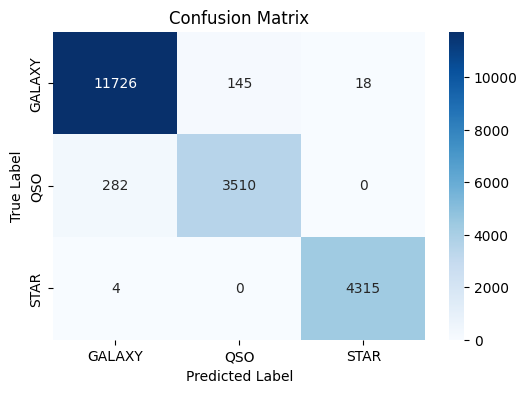

In [11]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()